- title: Занятие 4
- author: Ivan Stepanov
- date: 2023-11-03
- slug: s3_lab04
- ipynb_url: download/s3_lab04.ipynb

# Лабораторная 4

## 1. Производительность NumPy

На прошлом семинаре мы с вами подробно рассмотрели NumPy. Сейчас рассмотрим вопросы, касающиеся его производительности.

In [1]:
import numpy as np

Рассмотрим пример - сумма первых 100000000 чисел.

In [2]:
%%time

sum_not_np = sum(range(100000000))
print(sum_not_np)

4999999950000000
Wall time: 2.15 s


Теперь проделаём все тоже самое, но используя библиотеку NumPy.

In [3]:
%%time

sum_np = np.arange(100000000).sum()
print(sum_np)

887459712
Wall time: 143 ms


Как видим скорость работы в случае numpy намного лучше.

### Задание 1

Реализуйте произведение первых 100000 натуральных чисел:
* без numpy
* с numpy

Сравните время выполнения

## 2. NumPy и логические выражения

Как вы уже знаете в Python имеется самостоятельный логический тип
bool, с двумя предопределенными значениями:

* True — истина
* False — ложь



Логика высказываний, пропозициональная логика (лат. propositio — «высказывание») или исчисление высказываний, также логика нулевого порядка — это раздел символической логики, изучающий сложные высказывания, образованные из простых, и их взаимоотношения.

В ней выделяют *атомарные* и *составные* высказывания. **Атомарные высказывания** для логики 0-го порядка являются неделимыми.

**Составные высказывания** образуются из атомарных при помощи **логических операций**. Логическая операция применимая к одному значению называется *унарной*, и применимай к двум - *бинарной*.

В Python наиболее популярными логическими операциями являются:

In [4]:
a = True
b = False

In [5]:
# Не
print(not a)
# И
print(a and b)
# Или
print(a or b)
# Исключающее «или»
print(a ^ b)
# Отношение эквивалентности
print(a == b)


False
False
True
True
False


### Задача 2
Вам дано логическое уравнение, зависящее от нескольких логических переменных.
Требуется найти количество решений данного логического уравнения.

$(\lnot (K \lor L) \lor (L \land M \land N)) \lor (T \land M ) = 0$

### 2.1 Ленивые операции И и ИЛИ
Если значение высказывания уже ясно исходя из значения левого операнда (того, что *слева* от оператора), то логический оператор "ленится" вычислять правый операнд. Иногда это бывает важно, особенно если вычисление правого операнда невозможно при условии истинности или ложности левого.

В большинстве случаев не важно, какое высказывание стоит слева, а какое справа от И и ИЛИ, поскольку таблица истинности от этого не зависит.
Но вот пример, когда мы явно пользуемся "ленивыми операциями":

In [6]:
A = "I'M A LAZY LOGICAL OPERATION"
i = 30

### Задача 3

Выполните две следующие ячейки кода и объясните данное поведение.

In [7]:
i < len(A) and A[i] == 'Y'

False

In [8]:
A[i] == 'X' and i < len(A)

IndexError: string index out of range

Ваша ответ:

### 2.2 Векторные логические операции
Как вы уже знаете, операции с массивами NumPy векторные, то есть они выполняются сразу со всеми элементами массива. Это касается не только домножений на число и применений функций NumPy, но и логических операций:

In [9]:
import numpy as np
A = np.array([10, 53, 61, 23, 66, 12, 63, 63, 36, 77, 91, 82]).reshape((3, 4))
print(A)
print(A > 50)

[[10 53 61 23]
 [66 12 63 63]
 [36 77 91 82]]
[[False  True  True False]
 [ True False  True  True]
 [False  True  True  True]]


Ценно то, что такой **массив логических значений может быть использован для доступа к элементам исходного массива** как на чтение, так и на запись. Для этого важно совпадение `shape` данных массивов. Можно считать, что логический массив является как бы "маской доступа" к элементам исходного массива.

Теперь мы можем занулить элементы по некоторому условию:

In [10]:
B = A.copy()
B[B > 50] = 0
print(B)

[[10  0  0 23]
 [ 0 12  0  0]
 [36  0  0  0]]


### 2.3 Логические операции с логическими массивами NumPy
Раз массивы логических значений так удобны, стоит узнать как осуществлять с ними массовые, *векторные логические операции*.
Создадим два логических массива для экспериментов:

In [11]:
import numpy as np
A = np.array([False, True, True, True])
B = np.array([False, True, False, True])

С массивами Numpy логические операции: and, or не работают. Однако работают операции `&`, `|`, `~`:

In [12]:
print(A)
print(B)
# Логическое И
print(A & B)
# Логическое Или
print(A | B)

[False  True  True  True]
[False  True False  True]
[False  True False  True]
[False  True  True  True]


## 3. Статистика и случайные числа в NumPy

### Задача 4

Вам даны некоторые статистические значения оценок некоторой группы оценок по некоторому предмету: 8 2 3 5 6 7 8 10 4 5 9 8 8 9 10 2 3 4 9 10

Вычислите:

* максимальную оценку
* минимальную оценку
* среднее зачение оценок
* медиану оценок
* моду оценок


### 3.1 Случайные числа

В NumPy существует генератор псевдослучайных чисел в подмодуле random. Числа являются ***псевдо случайными***, в том плане что, они сгенерированы детерминистически из порождающего элемента, но рассредоточены в статистическом сходстве с случайным образом.

Случайность в компьютерах отдельная и очень интересная тема!!!

Массив случайных чисел из полуинтервала [0.0, 1.0) может быть сгенерирован так:

In [13]:
np.random.rand(10)

array([0.36926515, 0.74510676, 0.26828905, 0.35253334, 0.90765344,
       0.01056092, 0.33068823, 0.87689813, 0.10321486, 0.32478593])

Мы можем сгенерировать и 2-d массив случайных чисел

In [14]:
np.random.rand(3,3)

array([[0.21752501, 0.18323994, 0.59556015],
       [0.88160247, 0.02785209, 0.17383089],
       [0.60687705, 0.75410668, 0.85884607]])

 NumPy включает генераторы многих распределени

 * биноминальное
 * геометрическое
 * нормальное
 * логарифмическое
 * и многих других

### Задача 5

Сгенерируйте с помощью NumPy выборку некоторого распределения(только не из непрерывного равномерного распределения). Найдите максимальное и минимальное значение выборки.

###  3.2 Ковариационная матрица

Пусть η,ξ  — две случайные величины, определённые на одном и том же вероятностном пространстве. Тогда ковариацией случайных величин (англ. covariance) η и ξ называется выражение следующего вида:

$Cov(η,ξ)=E((η−Eη)⋅(ξ−Eξ))$, $Eξ$ - матожидание случайной величины ξ.

Матрица ковариаций (англ. covariance matrix) — это матрица, элементы которой являются попарными ковариациями элементов одного или двух случайных векторов. Ковариационная матрица случайного вектора — квадратная симметрическая неотрицательно определенная матрица, на диагонали которой располагаются дисперсии компонент вектора, а внедиагональные элементы — ковариации между компонентами.

Создадим набор данных, содержащий результаты ЕГЭ 20 разных учащихся по трем предметам: математике, физике и литературе.

In [48]:
math = [84, 90, 91, 97, 87, 99, 100, 70, 65, 49, 84, 90, 91, 97, 87, 99, 100, 70, 65, 49]
physic = [83, 89, 91, 97, 87, 99, 100, 55, 65, 87, 83, 89, 91, 97, 87, 99, 100, 55, 65, 87]
lit = [76, 75, 73, 98, 26, 83, 73, 90, 100, 100, 100, 99, 98, 89, 98, 97, 100, 100, 80, 100]

data = np.array([math, physic, lit])

Создадим ковариционную матрицу для данного набора данных

In [49]:
np.cov(data, bias=True)

array([[251.96  , 141.04  , -58.2   ],
       [141.04  , 192.81  , -22.475 ],
       [-58.2   , -22.475 , 303.2875]])

О чём говорят полученные результаты?

Значения по диагоналям матрицы — это просто дисперсии каждого субъекта. Например:

* Дисперсия оценок по математике составляет ***251.96***
* Дисперсия оценок по физике составляет ***192.81***
* Дисперсия оценок литературе составляет ***303.2875***
* Ковариация между оценками по математике и физике составляет ***141.04***
* Ковариация между оценками по математике и литературе составляет ***-58.2***
* Ковариация между оценками по физике и литературе составляет ***-22.475***

положительное число для ковариации указывает, что две переменные имеют тенденцию увеличиваться или уменьшаться в тандеме.

Отрицательное число ковариации указывает на то, что по мере увеличения одной переменной вторая переменная имеет тенденцию к уменьшению.

Мы также можен визуализировать матрицу ковариации. С помощью библиотек seaborn и matplotlib(о них мы поговоримпозднее).

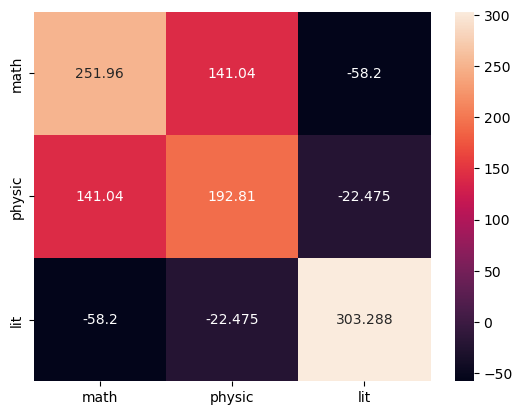

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

cov = np.cov(data, bias=True)
labs = ['math', 'physic', 'lit']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

### Задача 6
Сгенерируйте выборку двух нормальных и одного экспоненциального распределения.

Постройте матрицу ковариации для трёх данных выборок.

Визуализируйте построенную матрицу ковариации.

P.S Нужно понимать чёткое различие между ***ковариацией*** и ***корреляцией***. ***Корреляция*** - это мера силы линейности двух переменных, а ***ковариация*** - мера силы корреляции. Значения корреляции - от минус 1 до плюс 1, в то время как диапазон ковариации не является постоянным и может быть положительным или отрицательным.

Пусть η,ξ — две случайные величины, определённые на одном и том же вероятностном пространстве. Тогда ***корреляцией*** случайных величин (англ. correlation) η и ξ называется выражение следующего вида:

$corr(η, ξ) = \frac{Cov(η,ξ)}{\sigma_η \sigma_ξ}$, где 
* Cov(η,ξ) - ***ковариация случайных величин***
* $\sigma_η$ - дисперсия η
* $\sigma_ξ$ - дисперсия ξ

### Задача 7

Постройте матрицу корелляции для данных из задачи 6. Выполните также её визуальное представление. 

### Энтропия

***Информационная энтропия*** — мера неопределённости некоторой системы (в статистической физике или теории информации), в частности, непредсказуемость появления какого-либо символа первичного алфавита. В последнем случае при отсутствии информационных потерь энтропия численно равна количеству информации на символ передаваемого сообщения.

Для случайной величины x, принимающей n независимых случайных значений $x_{i}$ с вероятностями 
$p_{i}$ верна формула для энтропии: $H(x) = - \sum_{i=1}^{i} p_i \cdot log_2(p_i)$


### Задача 8

Реализуйте функцию, принимающую на вход вероятностное распределение x - массив $p_i$, а возвращающую энтропию x. Реализуйте,
* используя scipy.stats.entropy
* не используя scipy.stats.entropy

## 4. Интегралы

Давайте теперь посчитаем интеграл $\int^2_0{e^{-x^2}}{\rm d}x$, воспользовавшись scipy,

In [18]:
from scipy.integrate import quad, odeint
from scipy.special import erf

def f(x):
    return np.exp(-x ** 2)

res, err = quad(f, 0, 2)

# res - результат
# err - оценка ошибки

### Задача 9

Рассчитайте следующие интегралы:
1. $\int^\infty_0{e^{-x^2}}{\rm d}x$
2. $\int^{10}_0{sin(x^2) + cos(x^2)}{\rm d}x$
3. $\int^{2}_{-2}{x^3}{\rm d}x$

## 5. Работа с изображениями в NumPy и SciPy

Будем считывать изображение с помощью функции imread().

C:\Users\79826\AppData\Local\Temp\ipykernel_20404\2421847274.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cat.jpg')


(960, 1280, 3)
uint8


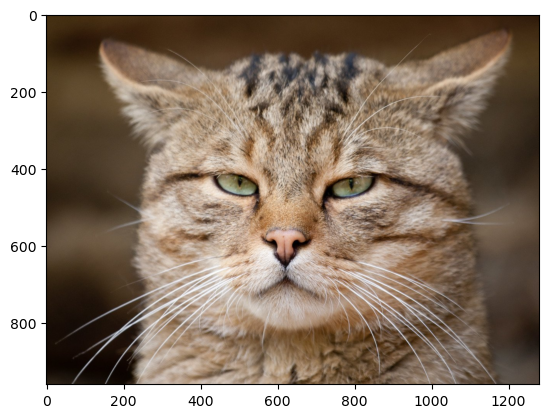

In [50]:
from scipy import misc
import imageio
import matplotlib.pyplot as plt
 
image = imageio.imread('cat.jpg')
 
print(image.shape)
print(image.dtype)
 
plt.imshow(image)
plt.show()

Что же значат данные цифры: (960, 1280, 3)?

Как вы могли догадаться 960 и 1280 это расширение картинки(число пикселей по двум осям). Куда интересен третий параметр - цифра 3. Здесь цифра 3 означает три канала. 

При аддитивном синтезе (смешивание лучей света) основными цветами являются красный (Red), зелёный (Green), синий (Blue) (RGB-модель). Так и в нашей картинке пискель является "смешением этих трёх основных цветов". 

В любой момент мы можем узнать ***"значение пикселя"*** следующим образом:

In [52]:
image[0][0]

Array([61, 40, 11], dtype=uint8)

Поскольку мы знаем, что изображения представлены числами в матрице, то изменение значения матрицы приведет к изменению исходного изображения.

Давайте занулим некоторое количество пикселей и посмотрим, что произойдёт: 

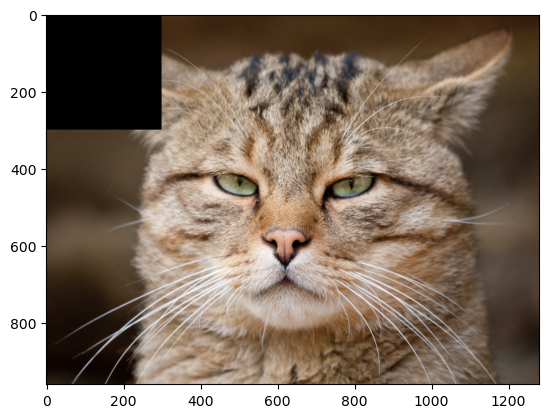

In [29]:
for i in range(300):
    for j in range(300):
        image[i][j] = 0
        
plt.imshow(image)
plt.show()

Теперь можем наблюдать, что часть картинки закрашена чёрных квадратом. Это и есть нулевые пиксели.

Теперь давайте попробуем не занулить пиксели, а задать им определённое значение. 

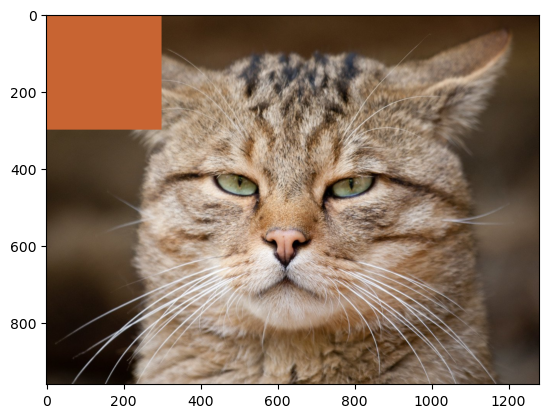

In [32]:
for i in range(300):
    for j in range(300):
        image[i][j] = 200, 100, 50
        
plt.imshow(image)
plt.show()

Получили оранжевый квадрат. Стоит также отметить, что пиксели могут принемать значение ***от 0 до 255***. 

Давайте теперь попробуем ***обрезать*** наше изображение. 

C:\Users\79826\AppData\Local\Temp\ipykernel_20404\1320738768.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cat.jpg')


(960, 1280, 3)
uint8


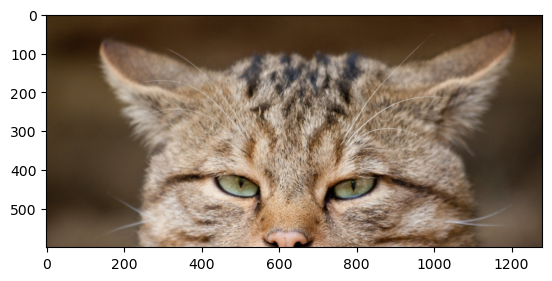

In [37]:
from scipy import misc
import imageio
import matplotlib.pyplot as plt
 
image = imageio.imread('cat.jpg')

crop = image[0:600]
 
print(image.shape)
print(image.dtype)
 
plt.imshow(crop)
plt.show()

Можем также повернуть наше изображение:

C:\Users\79826\AppData\Local\Temp\ipykernel_20404\170703583.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cat.jpg')


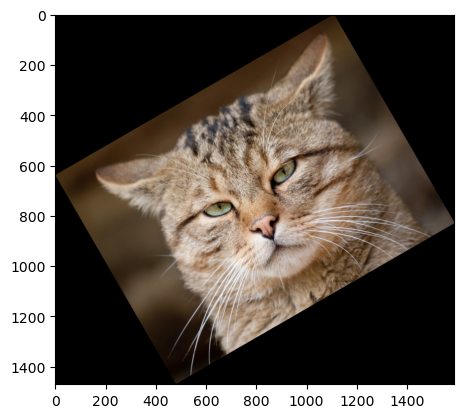

In [40]:
from scipy import misc,ndimage
import matplotlib.pyplot as plt
 
image = imageio.imread('cat.jpg')

rotate = ndimage.rotate(image, 30)
 
plt.imshow(rotate)
plt.show()

Наша картинка ***повернулась на 30 градусов***. Мы можем также её зеркально отобразить:

C:\Users\79826\AppData\Local\Temp\ipykernel_20404\1382522647.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('cat.jpg')


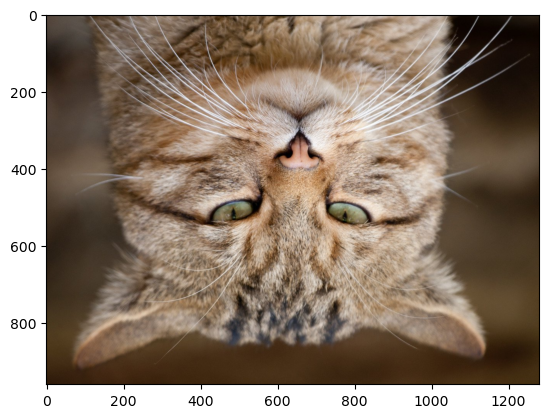

In [41]:
from scipy import misc,ndimage
import matplotlib.pyplot as plt
 
image = imageio.imread('cat.jpg')

rotate = ndimage.rotate(image, 180)
 
plt.imshow(rotate)
plt.show()

### Задача 10(3 балла)

* Загрузите картинку на ваш выбор
* Замените половину пикселей на чёрные пиксели в шахматном порядке
* Разделите картинку на 4 примерно равные по размеру картинки
* На основе исходной картинки создайте зашумленные картинку
* Найдите пиксель с максимальным и минимальным значением

## 6. Гистограммы

Гистограмма — это хороший способ визуализировать частотное распределение набора данных, разбив его на небольшие равные по размеру интервалы, называемые ***бинами***.

Функция гистограммы в NumPy и в Matplotlib примерно похожи, с той лишь разницей, что гистограмма Numpy дает числовое представление набора данных, а hist() дает графическое представление набора данных.

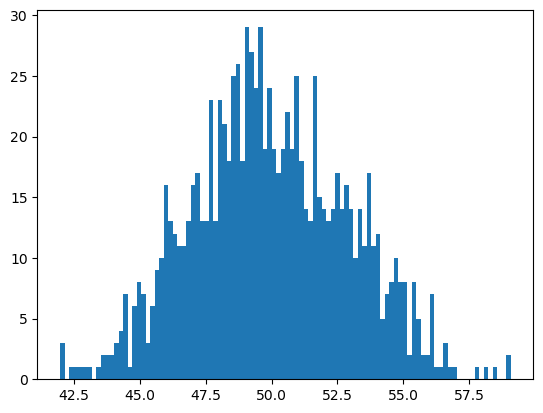

In [53]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
 
# создаём выборку из нормального распределения
values = np.random.normal(50, 3, 1000)

# строим гистограмму
plt.hist(values, 100)
plt.show()

### Задача 11

Сгенерируйте выборку из экспоненциального распределения. Постройте несколько гистограмм со значениями ***bins = [5, 10, 20, 50, 100]***.
Подумайте и ответьте, какой фундаментальный смысл этого параметра.